In [1]:
from scipy.integrate import trapz, simps
import pandas as pd
import numpy as np
import os

import simtk.unit as u

import matplotlib
# matplotlib.use('pgf')

import matplotlib.pyplot as plt
%matplotlib inline


%load_ext line_profiler

In [2]:
exps = [1, 3, 4, 5, 6]
units = range(1950, 2275)
store = dict()

In [3]:
def load_meta_data(exp, unit):
    folder = os.path.join(f'exp-{exp}', 'units', f'unit.{unit:06d}')
    metadata_file = os.path.join(folder, 'sim_desc.txt')
    success = os.path.exists(os.path.join(folder, 'simulation-6.alch'))
    with open(metadata_file) as f:
        comps = f.readline().strip().split('-')
        return exp, unit, np.int(comps[1]), np.float(comps[3]), success, os.path.join(folder, 'simulation-6.alch')

_meta_data = pd.DataFrame([load_meta_data(exp, unit) for exp in exps for unit in units], 
                          columns=['experiment', 'unit', 'replica', 'ld_window', 'success', 'path'])

In [4]:
_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 6 columns):
experiment    1625 non-null int64
unit          1625 non-null int64
replica       1625 non-null int64
ld_window     1625 non-null float64
success       1625 non-null bool
path          1625 non-null object
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 65.1+ KB


In [5]:
def load_data(exp, replica, ld_window):
    metad = _meta_data[(_meta_data.experiment == exp) & 
                      (_meta_data.replica == replica) & 
                      (_meta_data.ld_window == ld_window)]
    metad = metad.iloc[0]
    
    if not metad.success:
        return None
    
    try:
        return store[metad.path]
    except KeyError:
        df = pd.read_csv(metad.path, delim_whitespace=True, index_col=1, skiprows=[1, 2, 3, 4])
        df = df.drop([col for col in df.columns if 'TITLE' in col or 'AVG' in col or 'BOND' in col], axis=1)
        df._metadata = ['EFF_ELECT1', 'EFF_VDW1', 'EFF_ELECT2', 'EFF_VDW2']

        with open(metad.path) as f:
            _, _, p1, p2  = (next(f).split() for _ in range(4))
            df.EFF_ELECT1 = float(p1[8])
            df.EFF_VDW1   = float(p1[6])
            df.EFF_ELECT2 = float(p2[8])
            df.EFF_VDW2   = float(p2[6])

        store[metad.path] = df
        return df

In [34]:
def load_data(exp, replica, ld_window):
    path = f'exp-{exp}/LAMBDA_{ld_window:.2f}/replicas/rep{replica+1}/simulation/sim1.alch'
    try:
        return store[path]
    except:
        df = pd.read_csv(path, delim_whitespace=True, index_col=1, skiprows=[1, 2, 3, 4, 5, 6, 7, 8, 9])
        df = df.drop([col for col in df.columns if '#' in col or 'avg' in col or 'PME' in col], axis=1)
        df._metadata = ['EFF_ELECT1', 'EFF_VDW1', 'EFF_ELECT2', 'EFF_VDW2']

        df.columns = ['ELECT1', 'VDW1', 'ELECT2', 'VDW2']

        with open(path) as f:
            _, _, _, p1, p2, p3, p4  = (next(f).split() for _ in range(7))
            df.EFF_VDW1   = float(p1[4])
            df.EFF_ELECT1 = float(p2[4])
            df.EFF_VDW2   = float(p3[4])
            df.EFF_ELECT2 = float(p4[4])

        store[path] = df
        return df

In [10]:
load_data(1, 1, 0.0)

,ELECT1,VDW1,ELECT2,VDW2,dELECT,dVDW,dU
TS,,,,,,,
0,-90.7381,-9.8917,-43.8096,21.3935,43.8096,-21.3935,58.260318
1000,-102.1074,12.5890,-44.7501,25.6226,44.7501,-25.6226,55.741218
2000,-85.8937,-7.7428,-46.1330,28.9690,46.1330,-28.9690,54.909182
3000,-89.8789,6.2710,-48.0279,26.0485,48.0279,-26.0485,61.274955
4000,-115.6739,16.3584,-44.6360,22.0840,44.6360,-22.0840,59.072364
5000,-7.0940,26.7889,-44.3757,24.2803,44.3757,-24.2803,56.402791
6000,-94.0749,14.8026,-45.7031,26.7235,45.7031,-26.7235,56.373045
7000,-23.1529,21.4546,-44.8861,32.8342,44.8861,-32.8342,48.776891
8000,-73.9419,13.3355,-44.1987,24.9996,44.1987,-24.9996,55.361673


In [7]:
ldmult = lambda x: float(bool(x))

def calculate_dUdl_all(df):
    if df is None:
        return pd.Series(np.full(3001, np.nan))
    try:
        if not df.dU.empty:
            return df.dU
    except AttributeError:
        pass
    
    df['dELECT'] = ldmult(df.EFF_ELECT1) * df.ELECT1 - ldmult(df.EFF_ELECT2) * df.ELECT2
    df['dVDW']   = ldmult(df.EFF_VDW1)   * df.VDW1   - ldmult(df.EFF_VDW2)   * df.VDW2
    df['dU']     = 1/0.55 * df.dELECT + df.dVDW
    return df.dU

def calculate_dUdl(df, up_to=None):
    return calculate_dUdl_all(df)[:up_to].mean()

In [36]:
def calculate_ti(exp, up_to=None):
    X = np.linspace(0, 1, 65)
    dUdl = [[calculate_dUdl(load_data(exp=exp, replica=rep, ld_window=ld), up_to=up_to) for rep in range(5)] for ld in X]
    Y = np.nanmean(np.array(dUdl), axis=1)
    return np.asarray([X, Y]).T

In [37]:
def sub_array(X_sub, X, Y):
    if X_sub is None:
        return np.asarray([X, Y]).T
    
    return np.asarray([(X[(np.abs(X - x)).argmin()], Y[(np.abs(X - x)).argmin()]) for x in X_sub])

In [38]:
def calculate_integral(exp, X_sub=None, up_to=None):
    f = calculate_ti(exp, up_to)
    b = sub_array(X_sub, *f.T)
    return trapz(*np.flip(b, axis=1).T)

In [39]:
def calculate_full_integral_on(exp, a, b):
    a, b = (a, b) if a < b else (b, a)
    X = np.linspace(0, 1, 65)
    X_sub = X[(X>=a) & (X<=b)]
    return calculate_integral(exp, X_sub)

In [40]:
def calculate_integral_error(exp, X_sub):
    X_sub = np.asarray(X_sub)
    X = np.linspace(0, 1, 65)
    X_full = X[(X >= X_sub.min()) & (X <= X_sub.max())]
    return abs(calculate_integral(exp, X_full) - calculate_integral(exp, X_sub))

In [41]:
X_non_adapt = np.asarray([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0])

In [42]:
calculate_integral_error(6, [0.5, 0.625])

FileNotFoundError: File b'exp-6/LAMBDA_0.00/replicas/rep1/simulation/sim1.alch' does not exist

In [14]:
calculate_integral(1)

-58.51034450876538

In [13]:
def recursive_asr(exp, a,b,eps):
    XS.add(a)
    XS.add(b)
    whole = calculate_full_integral_on(exp, a, b)
    "Recursive implementation of adaptive Simpson's rule."
    c = (a+b) / 2.0
    left = calculate_integral(exp, [a, c])
    right = calculate_integral(exp, [c, b])
    if abs(left + right - whole) <= eps:
        return left + right
    return recursive_asr(exp,a,c,eps) + recursive_asr(exp, c,b,eps)

def adaptive_simpsons_rule(exp, eps=None):
    global XS
    XS = set()
    X_non_adapt = np.asarray([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0])
    eps = eps or calculate_integral_error(exp, X_non_adapt)
    "Calculate integral of f from a to b with max error of eps."
    i = recursive_asr(exp,0,1,eps)
    e = abs(i - calculate_integral(exp))
    print(f'Adap: {i.round(2)}+-{e.round(2)}. Nonadapt error: {eps.round(2)}.')
    print(f'Using {len(XS)} windows:', np.sort(np.asarray(list(XS))))
    return i

In [126]:
_ = adaptive_simpsons_rule(1)
_ = adaptive_simpsons_rule(3)
_ = adaptive_simpsons_rule(4)
_ = adaptive_simpsons_rule(5)
_ = adaptive_simpsons_rule(6)

Adap: -58.6+-0.09. Nonadapt error: 0.64.
Using 10 windows: [ 0.       0.25     0.375    0.4375   0.46875  0.5      0.5625   0.625
  0.75     1.     ]
Adap: 2.14+-0.01. Nonadapt error: 0.2.
Using 7 windows: [ 0.       0.03125  0.0625   0.125    0.25     0.5      1.     ]
Adap: 2.31+-0.48. Nonadapt error: 0.22.
Using 6 windows: [ 0.      0.5     0.75    0.875   0.9375  1.    ]
Adap: -28.67+-0.01. Nonadapt error: 0.44.
Using 7 windows: [ 0.       0.25     0.375    0.4375   0.46875  0.5      1.     ]
Adap: 5.0+-0.03. Nonadapt error: 0.05.
Using 14 windows: [ 0.       0.0625   0.125    0.25     0.375    0.4375   0.5      0.53125
  0.5625   0.625    0.75     0.875    0.9375   1.     ]


# Simple plots of betterness

We are talking scatter plots and bar plots of error decrease and cpuh savings

In [14]:
d = pd.DataFrame(columns=['System', 'Adaptive error', 'Non-adaptive error', 'Adaptive num ld', 'Non-adaptive num ld'])

In [15]:
d.loc[0] = ['PTP1B L1-L2'  , 0.09, 0.64, 10, 13]
d.loc[1] = ['PTP1B L10-L12', 0.07, 0.22,  6, 13]
d.loc[2] = ['TYK2 L7-L8'   , 0.03, 0.05, 14, 13]
d.loc[3] = ['TYK2 L4-L9'   , 0.01, 0.44,  7, 13]
d.loc[4] = ['MCL1 L32-L38' , 0.01, 0.20,  7, 13]

d['Error decrease'] = d['Non-adaptive error'] - d['Adaptive error']
d['Consumption decrease'] = (d['Non-adaptive num ld'] - d['Adaptive num ld']) * 815.399424
d['Consumption decrease'] = d['Consumption decrease'].astype(int)
d['Non-adaptive cpuh'] = 815.399424 * d['Non-adaptive num ld']
d['Adaptive cpuh'] = 815.399424 * d['Adaptive num ld']

d

,System,Adaptive error,Non-adaptive error,Adaptive num ld,Non-adaptive num ld,Error decrease,Consumption decrease,Non-adaptive cpuh,Adaptive cpuh
0,PTP1B L1-L2,0.09,0.64,10,13,0.55,2446,10600.2,8153.99
1,PTP1B L10-L12,0.07,0.22,6,13,0.15,5707,10600.2,4892.4
2,TYK2 L7-L8,0.03,0.05,14,13,0.02,-815,10600.2,11415.6
3,TYK2 L4-L9,0.01,0.44,7,13,0.43,4892,10600.2,5707.8
4,MCL1 L32-L38,0.01,0.20,7,13,0.19,4892,10600.2,5707.8


In [117]:
d.to_csv('savings.csv', index=False)

In [114]:
','.join(d.System)

'PTP1B L1-L2,PTP1B L10-L12,TYK2 L7-L8,TYK2 L4-L9,MCL1 L32-L38'

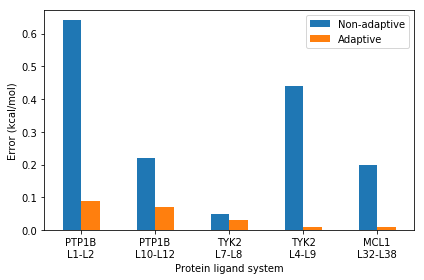

In [27]:
ax = d.plot.bar('System', ['Non-adaptive error', 'Adaptive error'])
ax.set_ylabel('Error (kcal/mol)')
ax.set_xlabel('Protein ligand system')
ax.legend(['Non-adaptive', 'Adaptive'])

plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('error.png', dpi=300)

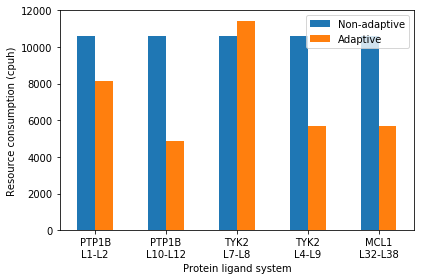

In [28]:
ax = d.plot.bar('System', ['Non-adaptive cpuh', 'Adaptive cpuh'])
ax.set_ylabel('Resource consumption (cpuh)')
ax.set_xlabel('Protein ligand system')
ax.legend(['Non-adaptive', 'Adaptive'])
ax.set_ylim([0, 12000])

plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('ld.png', dpi=300)


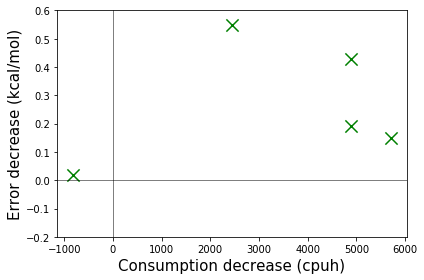

In [20]:
ax = d.plot.scatter('Consumption decrease', 'Error decrease', marker='x', s=150, c='g', 
                    fontsize=10, ylim=(-0.2, 0.6))
ax.set_xlabel('Consumption decrease (cpuh)', fontsize=15)
ax.set_ylabel('Error decrease (kcal/mol)', fontsize=15)
ax.axhline(c='k', linewidth=0.5)
ax.axvline(c='k', linewidth=0.5)

plt.tight_layout()
plt.savefig('global.png', dpi=300)

# Plot of error vs timesteps (converted to cpuh later)

- Error = Value - Ref.
- Value = cumulative mean of dUdl over timestep.
- Ref = high density ld window spacing singular result.
- We will scale the timestep to incorporate the number of ld windows.

In [275]:
exp=11

In [276]:
X = np.linspace(0, 1, 65)

X = X_non_adapt

Y = list()
Yerr = list()

for ld in X:
    dUdls = list()
    for rep in range(5):
        dUdls.append(calculate_dUdl_all(load_data(exp=exp, replica=rep, ld_window=ld)).values)
    dUdls = np.array(dUdls)
    mean = np.nanmean(dUdls, axis=0)
    err = np.nanstd(dUdls, axis=0)/np.sqrt(10001)
    Y.append(mean)
    Yerr.append(err)

Y = np.array(Y)
Yerr = np.array(Yerr)

In [277]:
nai = [(np.abs(X - x)).argmin() for x in X_non_adapt]

In [278]:
lds = [0.,0.25,0.375,0.4375,0.46875,0.5,0.5625,0.625,0.75,1.]
lds3 = [ 0.,0.03125,0.0625,0.125,0.25,0.5,1.,]
lds5 = [ 0.,0.25,0.375,0.4375,0.46875,0.5,1.,]
lds6 = [ 0.,0.0625,0.125,0.25,0.375,0.4375,0.5,0.53125,0.5625,0.625,0.75,0.875,0.9375,1.]
ai = [(np.abs(X - x)).argmin() for x in X_non_adapt]
      # [ 0.,0.0625,0.125,0.25,0.375,0.4375,0.5,0.53125,0.5625,0.625,0.75,0.875,0.9375,1]]
      # [ 0.,       0.25,     0.375,    0.4375,   0.46875,  0.5,      1.,     ]]
      # [ 0.,       0.03125,  0.0625,   0.125,    0.25,     0.5,      1.  ]]
      #[0., 0.25, 0.375, 0.4375, 0.46875, 0.5, 0.5625, 0.625, 0.75, 1.]]
    
    

In [279]:
a = (Y.cumsum(axis=1) / (np.arange(len(Y.T))+1))

In [280]:
a_err = (Yerr.cumsum(axis=1) / (np.arange(len(Yerr.T))+1))

In [281]:
c = np.array(list(map(lambda y: trapz(y, np.take(X, nai)), np.take(a.T, nai, axis=1))))

In [282]:
c_err = np.array(list(map(lambda y: trapz(y, np.take(X, nai)), np.take(a_err.T, nai, axis=1))))

In [283]:
d = np.array(list(map(lambda y: trapz(y, np.take(X, ai)), np.take(a.T, ai, axis=1))))

In [284]:
c = c.cumsum() / (np.arange(2001)+1)
d = d.cumsum() / (np.arange(2001)+1)

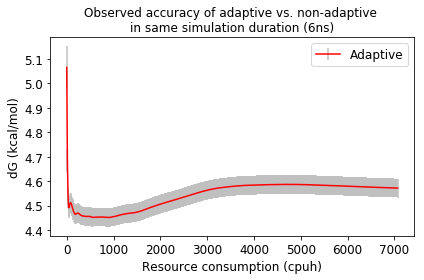

In [285]:
# plt.plot(np.arange(3001)*13*0.27179980800000003,abs(c), c='b')
plt.errorbar(x=(np.arange(2001)*13*0.27179980800000003)[::4],y=c[::4], yerr=c_err[::4], ecolor='silver', c='r')

# plt.vlines(8143.1222476800012, -0.005, 0.125, linewidth=1, linestyles='dashed')
# plt.vlines(10586.058921984, -0.005, 0.125, linewidth=1, linestyles='dashed')

# plt.hlines(0.0015858767437348931, 8143.1222476800012, 10586.058921984, linewidth=1, linestyles='dashed')
# plt.hlines(0.049299384672436553, 8143.1222476800012, 10586.058921984, linewidth=1, linestyles='dashed')

# plt.arrow(10586.058921984, 0.125, -2442.936674303999, 0, )

plt.title('Observed accuracy of adaptive vs. non-adaptive \nin same simulation duration (6ns)')
plt.legend(['Adaptive'], fontsize=12)
plt.xlabel('Resource consumption (cpuh)', fontsize=12)
plt.ylabel('dG (kcal/mol)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.savefig('error_conv.pdf', dpi=600)

In [286]:
data = {'Resource consumption': (np.arange(1000, 3001)*13*0.27179980800000003)[::4], 
        # 'Non-adaptive error': abs(c[4:]-calculate_integral(exp))}
        'dG': c[::4],
        'dG_err': c_err[::4]}
df = pd.DataFrame(data=data)

In [287]:
df.to_csv('adaptive_accuracy.csv', index=False)

In [298]:
for i in range(8):
    i+=1
    x = (np.arange(1000, 3001)*13*0.27179980800000003)[i*250]
    y = c[i*250]
    print("({},{})".format(x, y))

(4416.746880000001,4.451008938594887)
(5300.096256000001,4.490752904442608)
(6183.445632000001,4.543730747316334)
(7066.795008000001,4.5784909284966355)
(7950.144384000001,4.586120549368642)
(8833.493760000001,4.5843340530391075)
(9716.843136000001,4.577994475375011)
(10600.192512000001,4.571614686607193)


In [293]:
c

array([5.06558264, 4.96635068, 4.86053008, ..., 4.57165873, 4.57163676,
       4.57161469])

## Converting timestep to cpuh

Every timestep coresponds to cores run on the cpu. For this specific run.

6/3000 ns/timestep
0.0353906 days/ns
60 cpuh/1h

32 cpuh/h * 24 h / 1 day 

In [217]:
32*24*0.0353906*5*6*13

10600.192512000001

In [218]:
1/0.0353906

28.2560906003289

In [68]:
[X[(np.abs(X - x)).argmin() for x in X_non_adapt]

[0.0,
 0.046875,
 0.09375,
 0.203125,
 0.296875,
 0.40625,
 0.5,
 0.59375,
 0.703125,
 0.796875,
 0.90625,
 0.953125,
 1.0]

In [69]:
np.take(X, [(np.abs(X - x)).argmin() for x in X_non_adapt])

array([ 0.      ,  0.046875,  0.09375 ,  0.203125,  0.296875,  0.40625 ,
        0.5     ,  0.59375 ,  0.703125,  0.796875,  0.90625 ,  0.953125,
        1.      ])

In [75]:
load_data(1, 1, 0.0)

,ELECT1,VDW1,ELECT2,VDW2,dELECT,dVDW,dU
TS,,,,,,,
0,-90.7381,-9.8917,-43.8096,21.3935,43.8096,-21.3935,58.260318
1000,-102.1074,12.5890,-44.7501,25.6226,44.7501,-25.6226,55.741218
2000,-85.8937,-7.7428,-46.1330,28.9690,46.1330,-28.9690,54.909182
3000,-89.8789,6.2710,-48.0279,26.0485,48.0279,-26.0485,61.274955
4000,-115.6739,16.3584,-44.6360,22.0840,44.6360,-22.0840,59.072364
5000,-7.0940,26.7889,-44.3757,24.2803,44.3757,-24.2803,56.402791
6000,-94.0749,14.8026,-45.7031,26.7235,45.7031,-26.7235,56.373045
7000,-23.1529,21.4546,-44.8861,32.8342,44.8861,-32.8342,48.776891
8000,-73.9419,13.3355,-44.1987,24.9996,44.1987,-24.9996,55.361673
